<a href="https://colab.research.google.com/github/EbrahimAmir/MachineLearning-For-Stereolithography-3D-Printing/blob/main/SLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning for Stereolithography 3D Printing

In [38]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2 
import os

from tensorflow.keras import layers, losses, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, UpSampling2D, Softmax

In [2]:
!unzip Data.zip 

Archive:  Data.zip
   creating: Data/
   creating: Data/X/
  inflating: Data/X/x0001.png        
  inflating: Data/X/x0002.png        
  inflating: Data/X/x0003.png        
  inflating: Data/X/x0004.png        
  inflating: Data/X/x0005.png        
  inflating: Data/X/x0006.png        
  inflating: Data/X/x0007.png        
  inflating: Data/X/x0008.png        
  inflating: Data/X/x0009.png        
  inflating: Data/X/x0010.png        
  inflating: Data/X/x0011.png        
  inflating: Data/X/x0012.png        
  inflating: Data/X/x0013.png        
  inflating: Data/X/x0014.png        
  inflating: Data/X/x0015.png        
  inflating: Data/X/x0016.png        
  inflating: Data/X/x0017.png        
  inflating: Data/X/x0018.png        
  inflating: Data/X/x0019.png        
  inflating: Data/X/x0020.png        
  inflating: Data/X/x0021.png        
  inflating: Data/X/x0022.png        
  inflating: Data/X/x0023.png        
  inflating: Data/X/x0024.png        
  inflating: Data/X/x0025.png

In [39]:
Datadir = "Data"

CATEGORIES = ["X", "Y"]

In [40]:
input1 = []
output1 = []

input_main = []
output_main = []

input_main2 = []
output_main2 = []

train_input = []
test_input = []

train_output = []
test_output = []

In [41]:
limit = 50

a1 = 350
b1 = 600

path = os.path.join(Datadir, "X")
name = os.listdir(path)
name.sort()
i = 0
for img in name:
  img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
  # input_main.append(img_array/255.)
  # img_array = cv2.resize(img_array, (a1, b1))
  input1.append(img_array[a1:a1+100, b1:b1+100]/255.)
  i = i + 1
  if i == limit:
    break

In [6]:
from google.colab import files
from IPython.display import Image

In [8]:
uploaded = files.upload()

Saving data2.JPG to data2.JPG


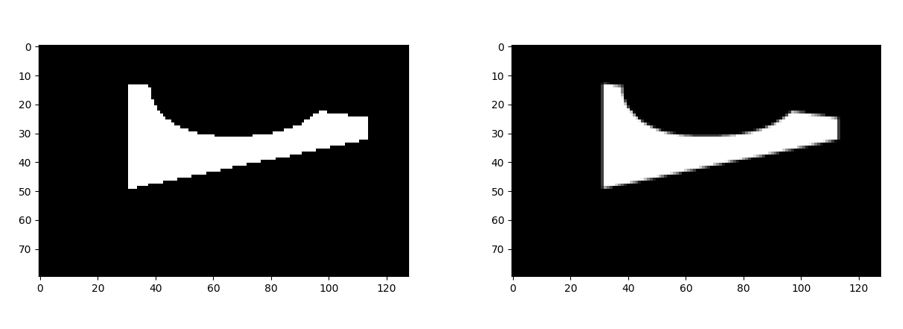

In [11]:
Image('data2.JPG', width = 800)

In [42]:
img_array0 = img_array

In [43]:
path = os.path.join(Datadir, "Y")
name = os.listdir(path)
name.sort()
i = 0
for img in name:
  img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
  # output_main.append(img_array/255.)
  # img_array = cv2.resize(img_array, (a1, b1))
  output1.append(img_array[350:450, 600:700]/255.)
  i = i + 1
  if i == limit:
    break

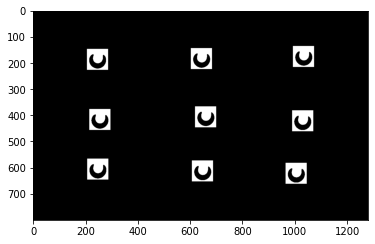

In [44]:
plt.imshow(img_array0, cmap = "gray")

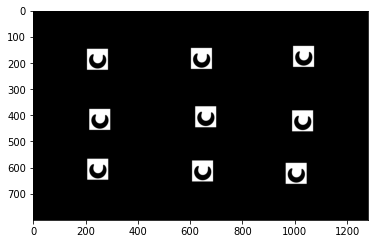

In [45]:
plt.imshow(img_array, cmap = "gray")

In [31]:
uploaded = files.upload()

Saving Picture3.png to Picture3.png


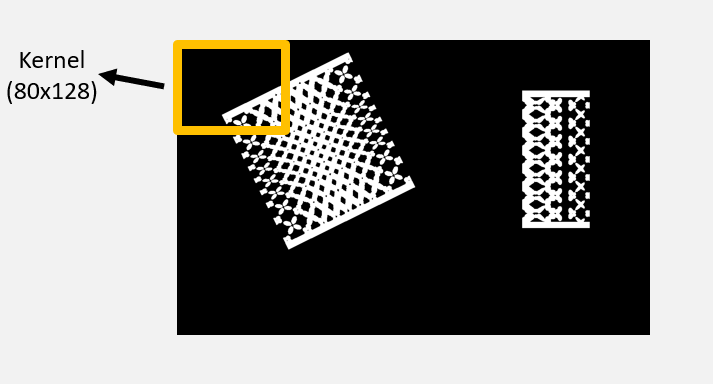

In [32]:
Image('Picture3.png', width = 800)

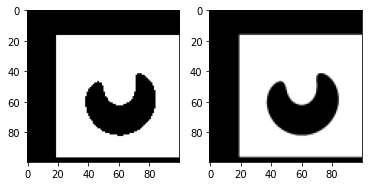

In [46]:
ax = plt.subplot(1, 2, 1)
plt.imshow(input1[0], cmap = "gray")

ax = plt.subplot(1, 2, 2)
plt.imshow(output1[0], cmap = "gray")


In [23]:
# plt.imshow(img_array, cmap="gray")
# plt.show()
# print(img_array.shape)
# break

In [47]:
a = np.random.permutation(limit)


l1 = int(len(a)/10*8)
l2 = int(len(a)/10*8+1)

for i in range(l1):
  train_input.append(input1[int(a[i])])
  train_output.append(output1[int(a[i])])

for i in range(l1, len(a)):
  test_input.append(input1[int(a[i])])
  test_output.append(output1[int(a[i])])
  # input_main2.append(input_main[int(a[i])])
  # output_main2.append(output_main[int(a[i])])

In [48]:

d1 = 100
d2 = 100

train_input  =   np.array(train_input).reshape(-1, d1, d2, 1)
train_output =   np.array(train_output).reshape(-1, d1, d2, 1)

val_input   =   np.array(test_input).reshape(-1, d1, d2, 1)
val_output  =   np.array(test_output).reshape(-1, d1, d2, 1)

test_input   =   np.array(test_input).reshape(-1, d1, d2, 1)
test_output  =   np.array(test_output).reshape(-1, d1, d2, 1)


input_main2  =   np.array(input_main2).reshape(-1, 800, 1280,1)
output_main2 =   np.array(output_main2).reshape(-1, 800, 1280,1)



# Defining the model

model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (d1, d2, 1), activation = "relu", padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))


model.add(Conv2D(64, (3,3), activation = "relu", padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))


model.add(Conv2D(64, (3,3), activation = "relu", padding = 'same'))
model.add(MaxPooling2D(pool_size=(1,1), padding='same'))


model.add(UpSampling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = "relu", padding = 'same'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = "relu", padding = 'same'))

model.add(Conv2D(1, (3,3), activation = "relu", padding = 'same'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 25, 25, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 64)      

In [26]:
uploaded = files.upload()

Saving CNN1.JPG to CNN1.JPG


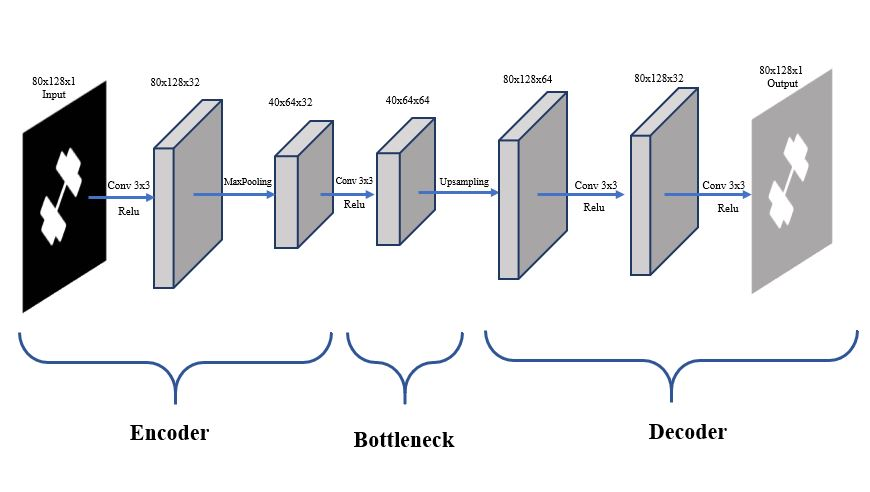

In [27]:
Image('CNN1.JPG', width = 800)

In [28]:
uploaded = files.upload()

Saving Picture1.png to Picture1.png


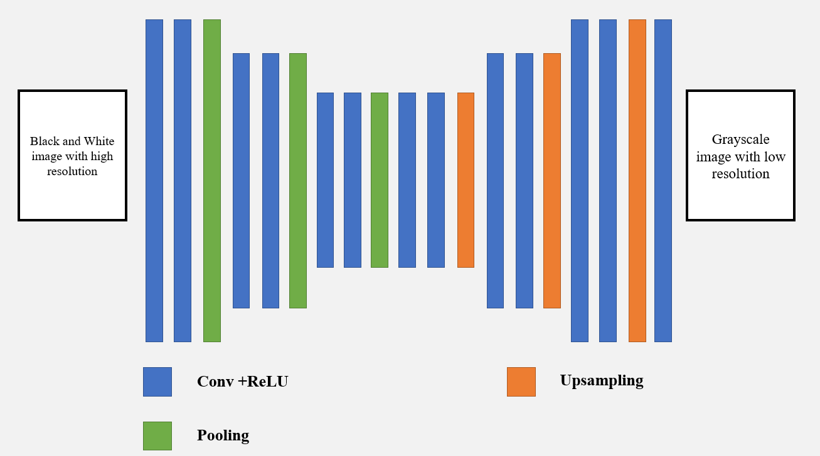

In [30]:
Image('Picture1.png', width = 800)

In [49]:

model.compile(optimizer=optimizers.Adam(), loss=losses.MeanSquaredError(), metrics=["accuracy"])

model.fit(train_input, train_output,
                epochs=20,
                batch_size=64,
                shuffle=True,
                validation_data=(test_input, test_output))

decoded_imgs = model.predict(test_input)

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.4838 - accuracy: 0.4843 - val_loss: 0.3828 - val_accuracy: 0.4947
Epoch 2/20
1/1 [==============================] - 0s 159ms/step - loss: 0.3916 - accuracy: 0.4843 - val_loss: 0.2504 - val_accuracy: 0.4947
Epoch 3/20
1/1 [==============================] - 0s 159ms/step - loss: 0.2554 - accuracy: 0.4843 - val_loss: 0.1069 - val_accuracy: 0.9170
Epoch 4/20
1/1 [==============================] - 0s 154ms/step - loss: 0.1068 - accuracy: 0.9193 - val_loss: 0.1405 - val_accuracy: 0.7968
Epoch 5/20
1/1 [==============================] - 0s 160ms/step - loss: 0.1368 - accuracy: 0.8034 - val_loss: 0.1114 - val_accuracy: 0.8265
Epoch 6/20
1/1 [==============================] - 0s 163ms/step - loss: 0.1085 - accuracy: 0.8317 - val_loss: 0.0493 - val_accuracy: 0.9052
Epoch 7/20
1/1 [==============================] - 0s 158ms/step - loss: 0.0475 - accuracy: 0.9080 - val_loss: 0.0835 - val_accuracy: 0.9102
Epoch 8/20
1/1 [=======

In [50]:
print(np.max(decoded_imgs[0]))

1.1606898


In [51]:
test_input.shape


test_input   =   np.array(test_input).reshape(-1, d1, d2)
decoded_imgs  =   np.array(decoded_imgs).reshape(-1, d1, d2)
test_output = np.array(test_output).reshape(-1, d1, d2)

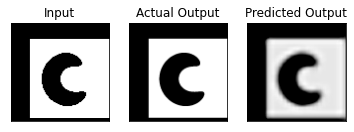

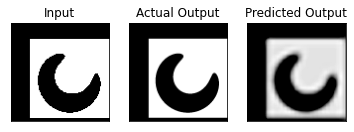

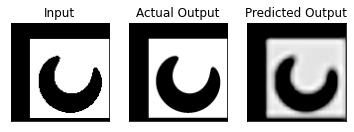

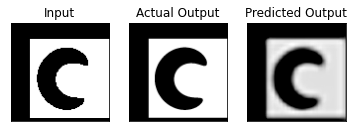

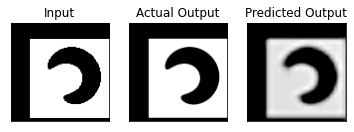

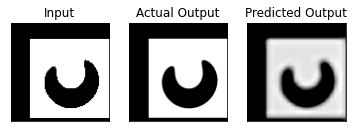

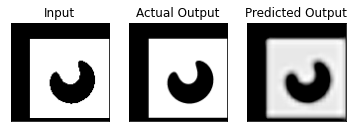

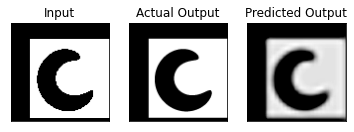

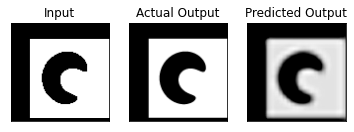

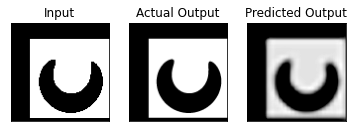

In [52]:
for i in range(10):

  ax = plt.subplot(1, 3, 1)
  plt.imshow(test_input[i,:,:]*255., cmap = "gray")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.title("Input")


  ax = plt.subplot(1, 3, 2)
  plt.imshow(test_output[i,:,:]*255., cmap = "gray")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.title("Actual Output")


  ax = plt.subplot(1, 3, 3)
  plt.imshow(decoded_imgs[i,:,:]*255., cmap = "gray")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.title("Predicted Output")


  plt.show()
